In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

## 실습 (t 분포)

In [2]:
t = 2.0
df = 100

prob = stats.t.cdf(t,df)
print("P(T<=t):{:.3f}".format(prob))

P(T<=t):0.976


## 실습 2

In [3]:
chisq = 3.0
df = 8

prob = stats.chi2.cdf(chisq,df)
print("P(X<={0}):{1:.4f}".format(chisq,prob))

P(X<=3.0):0.0656


## 실습 (F 분포)

In [4]:
f = 1.5
dfnum = 10
dfden = 100

prob = stats.f.cdf(x=f, dfn = dfnum, dfd = dfden)
print("P(X<=F):{:.3f}".format(prob))

P(X<=F):0.850


## 이항분포

In [5]:
n = 5
for i in range(n+1):
    prob = stats.binom.pmf(k=i, n=n, p=0.3)
    print("P(X={0})={1:.3f}".format(i,prob))

P(X=0)=0.168
P(X=1)=0.360
P(X=2)=0.309
P(X=3)=0.132
P(X=4)=0.028
P(X=5)=0.002


## 정규성 검정

In [6]:
ds_2sample = pd.read_csv("/home/piai/강의자료/Datahandling/BigData기초/2sample_t_test.csv")
ds_2sample.head()

,Mat_A,Mat_B,Total,Sub
0,73.4,68.7,73.4,1
1,77.0,71.4,77.0,1
2,73.7,69.8,73.7,1
3,73.3,75.3,73.3,1
4,73.1,71.3,73.1,1


In [7]:
data1 = ds_2sample['Mat_A'].dropna()  # 결측지 -> dropna()
stats.shapiro(data1)
statistic, p = stats.shapiro(data1)
print("Shapiro-Wilk Test: statistic = {:.3f}, p-value = {:.3f}".format(statistic, p))

Shapiro-Wilk Test: statistic = 0.906, p-value = 0.256


In [8]:
data2 = ds_2sample['Mat_B'].dropna()
stats.shapiro(data2)
statistic, p = stats.shapiro(data2)
print("Shapiro-Wilk Test: statistic = {:.3f}, p-value = {:.3f}".format(statistic, p))

Shapiro-Wilk Test: statistic = 0.973, p-value = 0.917


귀무가설 : 모집단은 정규분포를 따른다.

대립가설 : 모집단은 정규분포를 따르지 않는다.

정규성 검정결과(95%신뢰수준 사용 시) Mat_A와 Mat_B의 p-value가 각각 0.256, 0.917로 0.005보다 크기 때문에 정규분포를 따른다고 판단.

## 모평균 구간추정

In [9]:
df = pd.DataFrame({"sample" : [18, 18, 20, 21, 20, 23, 19, 18, 17, 21,
                              22, 20, 20, 21, 20, 19, 19, 18, 17, 19]})
df.head()

,sample
0,18
1,18
2,20
3,21
4,20


In [10]:
lower, upper = stats.norm.interval(0.95, loc = np.mean(df), scale = 3.8/np.sqrt(40))
print("신뢰구간: ({0},{1})".format(lower.round(2), upper.round(2)))

신뢰구간: ([18.32],[20.68])


/home/piai/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


95% 신뢰구간은 [18.32],[20.68]으로 모집단 평균이 이 구간 안에 있을 확률이 95%라는 것을 의미한다. 이 구간 밖의 값이 나올 경우, 해당 모집단에서 유의한 차이가 있다고 판단할 수 있다.

## 모평균 신뢰구간 추정 - 모표준편차를 모르는 경우

In [11]:
df = pd.DataFrame({"sample" : [73, 71, 74, 69, 70, 73, 70, 68, 75, 72,
                              70, 72, 73, 70, 70, 72, 71, 70, 75, 72]})
df.head()

,sample
0,73
1,71
2,74
3,69
4,70


In [12]:
lower, upper = stats.t.interval(0.95,len(df)-1, loc = np.mean(df), scale = stats.sem(df))
print("신뢰구간: ({0},{1})".format(lower.round(2), upper.round(2)))

신뢰구간: ([70.6],[72.4])


/home/piai/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


95% 신뢰구간은 [70.6],[72.4]으로 모집단 평균이 이 구간 안에 있을 확률이 95%라는 것을 의미한다. 이 구간 밖의 값이 나올 경우, 해당 모집단에서 유의한 차이가 있다고 판단할 수 있다.

## 1-Sample t-test

<Axes: >

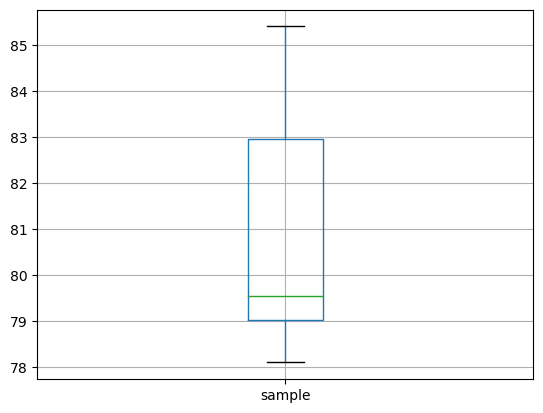

In [13]:
df = pd.DataFrame({'sample' : [85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4, 78.1, 79.2]})
df.boxplot(['sample'])

In [14]:
statistic, p = stats.shapiro(df['sample'])
print("statistic={:.3f}, p-value={:.3f}".format(statistic, p))

statistic=0.847, p-value=0.054


In [15]:
t_result = stats.ttest_1samp(df, 78.0)
t, p = t_result.statistic.round(3),t_result.pvalue.round(3)

print("1-sample t-test")
print("t 통계량 : {}".format(t))
print("p-value 통계량 : {}".format(p))

1-sample t-test
t 통계량 : [3.379]
p-value 통계량 : [0.008]


유의수준 5%에서 검정결과 P값이 0.008이므로 개선활동이 고객 만족도를 변화 시켰다고 할 수 있다.

## 2-Sample t-test

In [16]:
df = pd.DataFrame({'A': [1.883, 1.715, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344],
                  'B' : [1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.883]})

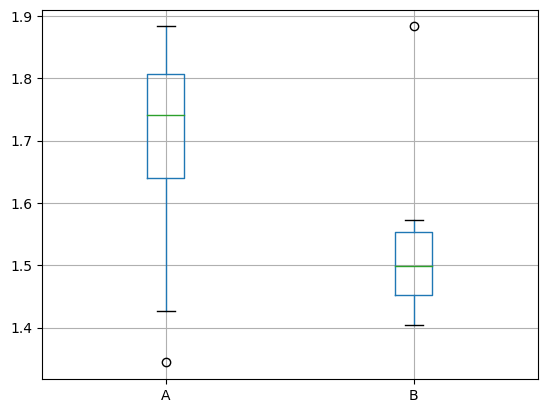

In [17]:
df.boxplot(['A','B'])
plt.show()

'A','B' 정규성 검정 : Shapiro-Wilk Test

In [18]:
statistic, p = stats.shapiro(df['A'])
print("stastic = {:.3f}, p-value={:.3f}".format(statistic,p))

stastic = 0.843, p-value=0.080


In [19]:
statistic, p = stats.shapiro(df['B'])
print("stastic = {:.3f}, p-value={:.3f}".format(statistic,p))

stastic = 0.773, p-value=0.015


In [20]:
# print(stats.bartlett(df['A'],df['B']))
print(stats.levene(df['A'],df['B']))

LeveneResult(statistic=0.4408416728536036, pvalue=0.5175025061092301)


In [21]:
t_result = stats.ttest_ind(df['A'],df['B'])
t, p = t_result.statistic.round(3),t_result.pvalue.round(3)

print("2-Sample t-Test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-Test
t:1.7
p:0.111


2 Sample t-test는 두 집단 간 평균이 같은지 비교한다.

귀무가설 : 공급자 간에 모평균 차이가 없다.

대립가설 : 공급자 간에 모평균 차이가 있다.

유의수준 5%에서 검정결과 p-value값이 0.111이므로 귀무가설을 따른다. 따라서 공급자 간에 모평균 차이가 없다.

## Paired t-test

In [22]:
df1 = pd.DataFrame({'before': [720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2 = pd.DataFrame({'after' : [710, 580, 787, 712, 750, 600, 782, 670, 790, 680]})

t_result = stats.ttest_rel(df1, df2)
t, p = t_result.statistic.round(4), t_result.pvalue.round(4)

print('paired t-test')
print(" t :{}".format(t))
print(" p :{}".format(p))

paired t-test
 t :[-2.2661]
 p :[0.0497]


귀무가설 : 회사원들의 성적은 학원가기 전후에 대해 차이가 없다.

대립가설 : 회사원들의 성적은 학원가기 전후에 대해 차이가 있다.

유의수준 5%에서 검정결과 p-value값이 0.04이므로 대립가설을 채택해야한다.
따라서 회사원들의 성적은 학원가기 전후에 대해 차이가 있다.

## 1 Proportion test

In [23]:
count = 40
n_obs = 100
value = 0.5

stat, pval = proportions_ztest(count, n_obs, value)

print('1 Proportion test')
print(" t :{0:0.3f}".format(stat))
print(" p :{0:0.3f}".format(pval))

1 Proportion test
 t :-2.041
 p :0.041


귀무가설 : 동전 앞면이 나올 확률은 50%이다.

대립가설 : 동전 앞면이 나올 확률은 50%가 아니다.

p-value값이 0.041이기 때문에 대립가설을 채택한다. 따라서 동전 앞면이 나올 확률은 50%가 아니다.

## 2 Proportion test

In [24]:
count = np.array([14, 5])
nobs = np.array([1200, 1200])

stat, pval = proportions_ztest(count, nobs)

print('2 proportion test')
print(" z :{0:0.3f}".format(stat))
print(" p :{0:0.3f}".format(pval))

2 proportion test
 z :2.073
 p :0.038


귀무가설 : 두 공정의 불량률은 같다.

대립가설 : 두 공정의 불량률은 같지 않다.

p-value가 0.038이므로 대립가설을 채택한다. 따라서 두 공정의 불량률은 같지 않고 차이가 있다고 판단할 수 있다.

## 카이제곱 검정

In [25]:
df = pd.DataFrame({'A':[18, 1, 8, 7, 10, 9, 10],'B':[8, 2, 14, 5, 5, 9, 4],'C':[4, 1, 3, 4, 9, 5, 4],
                   'D':[4, 1, 2, 3, 2, 3, 7],'E':[3, 1, 3, 1, 1, 1, 1],'F':[3, 25, 8, 10, 2, 1, 7]})

chi, pval, dof, expected = stats.chi2_contingency(df)

print("chi-square test")
print("chisq :{0:0.3f}".format(chi))
print("p :{0:0.3f}".format(pval))
print("degree of freedom : {}".format(dof))
print("expected value : \n{}".format(expected.round(3)))

chi-square test
chisq :98.666
p :0.000
degree of freedom : 30
expected value : 
[[11.004  8.21   5.24   3.843  1.921  9.782]
 [ 8.528  6.362  4.061  2.978  1.489  7.581]
 [10.454  7.799  4.978  3.651  1.825  9.293]
 [ 8.253  6.157  3.93   2.882  1.441  7.336]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]
 [ 7.703  5.747  3.668  2.69   1.345  6.847]
 [ 9.079  6.773  4.323  3.17   1.585  8.07 ]]


## ANOVA

In [26]:
df = pd.read_csv("/home/piai/강의자료/Datahandling/BigData기초/ANOVA.csv", encoding = 'euc-kr')
df.head()

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a


### 강종별로 2차 정련시간의 차이가 있는지 검정

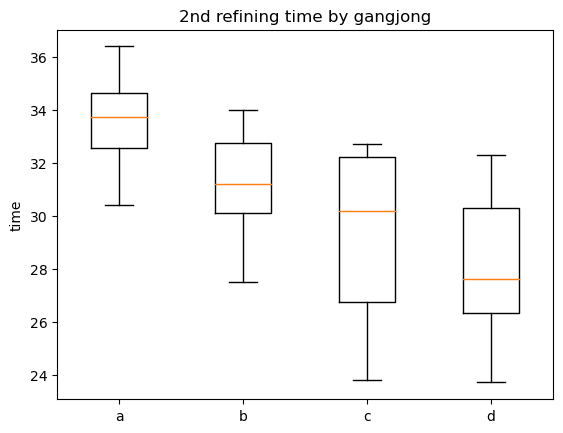

In [27]:
df_gangjong = df.groupby('gangjong')['time']

plt.boxplot([df_gangjong.get_group('a'), df_gangjong.get_group('b'), 
             df_gangjong.get_group('c'), df_gangjong.get_group('d')])
plt.xticks([1, 2, 3, 4], ['a', 'b', 'c', 'd'])
plt.ylabel('time')
plt.title('2nd refining time by gangjong')
plt.show()

In [28]:
a = df.loc[df['gangjong'] == 'a', 'time']
b = df.loc[df['gangjong'] == 'b', 'time']
c = df.loc[df['gangjong'] == 'c', 'time']
d = df.loc[df['gangjong'] == 'd', 'time']

In [29]:
f_result = stats.f_oneway(a,b,c,d)
f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("One-way")
print(" F 통계량 : {}".format(f))
print(" p-value : {}".format(p))

One-way
 F 통계량 : 4.172
 p-value : 0.019


귀무가설 : 강종별로 2차 정련시간의 차이가 없다(같다).

대립가설 : 강종별로 2차 정련시간의 차이가 있다.

유의수준 5%에서 검정결과 p-value값이 0.019이므로 대립가설을 채택한다.따라서 강종별로 2차 정련시간의 차이가 있다.

### 타입별로 2차정련 시간에 차이가 있는지 검정

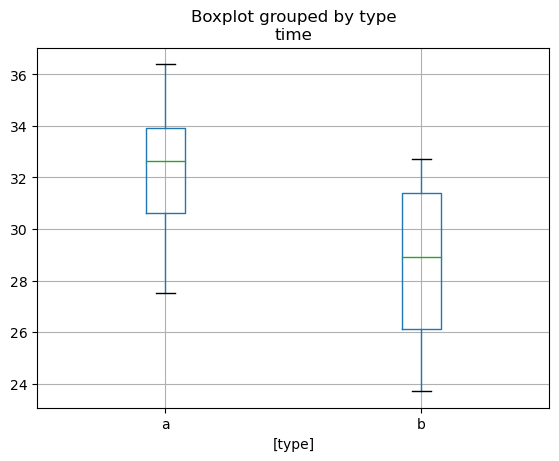

In [30]:
type_time = df.groupby('type')['time']

df.boxplot(column='time', by=['type'])
plt.show()

In [31]:
a = df.loc[df['type'] == 'a', 'time']
b = df.loc[df['type'] == 'b', 'time']

f_result = stats.f_oneway(a,b)
f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("One-way")
print(" F 통계량 : {}".format(f))
print(" p-value : {}".format(p))

One-way
 F 통계량 : 9.654
 p-value : 0.005


귀무가설 : 타입별로 2차정련 시간에 차이가 없다.

대립가설 : 타입별로 2차정련 시간에 차이가 있다.

검증결과 p-value값이 0.005로 대립가설을 채택한다. 따라서 타입별로 2차정련 시간에 차이가 있다.

## Correlation Analysis

In [32]:
df1 = [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1,
       36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5]
df2 = [14, 15, 14, 16, 17, 14, 17, 16, 15, 16, 
       14, 16, 18, 13, 15, 17, 14, 16, 20, 21]


corr , pval = stats.pearsonr(df1, df2)

print("Correlation Analysis")
print(" corr : {0:0.3f}".format(corr))
print(" p-value : {0:0.3f}".format(pval))

Correlation Analysis
 corr : -0.723
 p-value : 0.000


귀무가설 : 초코칩의 강도와 반죽온도간에 관계가 없다(같다).

대립가설 : 초코칩의 강도와 반죽온도간에 관계가 있다.

검증결과 p-value값이 0.000이므로 대립가설을 채택한다. 따라서 초코칩의 강도와 반죽온도간에 관계가 있으며 매우 강한 음의 상관성이 있다고 할 수 있다.